# Simple deep neural network
from coursera course Tensor Flow in Practice : https://www.coursera.org/specializations/tensorflow-in-practice

object detection using fashion_minst dataset from tensor flow library


In [10]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [11]:
mnist = tf.keras.datasets.fashion_mnist

In [12]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [13]:
print(len(train_img))
print(len(test_img))

60000
10000


In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

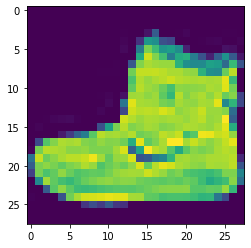

In [15]:
i = 0 # image number

plt.imshow(train_img[i])
print(train_img[i])
print(train_img[i].shape)

In [16]:
# Normalizing pixels

train_img = train_img / 255.0
test_img = test_img / 255.0

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

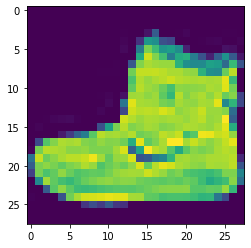

In [17]:
i = 0 # image number

plt.imshow(train_img[i])
print(train_img[i])
print(train_img[i].shape)

In [24]:
# creating network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

<h2>Neural Network</h2>
<img src="./assets/img.png" width="500">

`flatten layer`, `dense layer` or `hidden layer`,

<img src="./assets/nn.png" width="500">

In [25]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_img, train_label, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5019 - accuracy: 0.8236
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3793 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3403 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3155 - accuracy: 0.8839
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2932 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2819 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2703 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2570 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2481 - accuracy: 0.9078
Epoch 10/10
60

In [26]:
model.evaluate(test_img, test_label)

10000/10000 [==============================] - 1s 127us/sample - loss: 0.3435 - accuracy: 0.8783


[0.343543528008461, 0.8783]

# Exploring

In [22]:
prediction = model.predict(test_img)

In [23]:
prediction[0]

array([1.6573414e-07, 1.7116521e-10, 5.4898870e-11, 1.2047497e-11, 8.3135615e-10, 5.6108051e-06, 1.8053397e-07, 5.6834181e-04, 1.1455436e-08, 1.2244389e-02], dtype=float32)

prediction shows 10 values, the maximum value corresponds to the classification of the image.
i.e. for prediction of 0th test image, the prediction is :

array([1.6573414e-07, 1.7116521e-10, 5.4898870e-11, 1.2047497e-11, 8.3135615e-10, 5.6108051e-06, 1.8053397e-07, 5.6834181e-04, 1.1455436e-08, 1.2244389e-02]),

here, the max value is the 10th (or position 9) value meaning the test image is of 9th class